In [24]:
import numpy as np
import cv2 as cv

In [25]:
from matplotlib import pyplot as plt

def showImage(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [26]:
dataset = ['BW_Chessboard.jpg','chessboard.jpg', 'skyscraper.jpg', 'skyscraper1.jpg']

In [27]:
def findcorner(image,h,w):
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv.dilate(dst,None)
    # Threshold for an optimal value, it may vary depending on the image.
    image[dst>0.01*dst.max()]=[0,0,255]
    cv.imshow('dst',image)
    if cv.waitKey(0) & 0xff == 27:
        cv.destroyAllWindows()
    cv.putText(image,"Detect Corner",(h, w),cv.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255), 2)
    showImage(image)

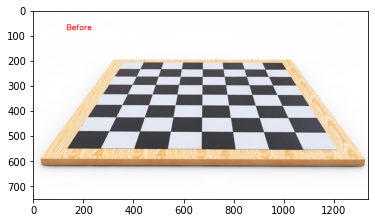

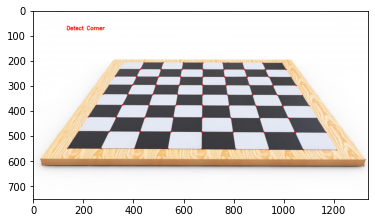

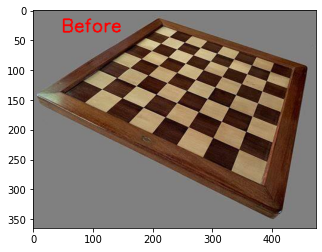

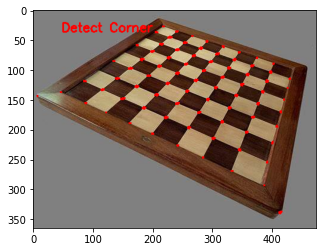

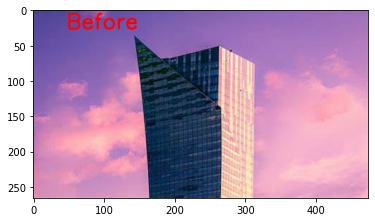

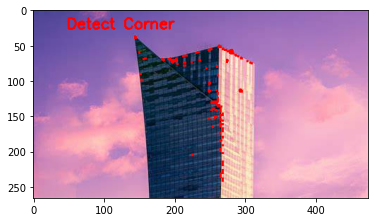

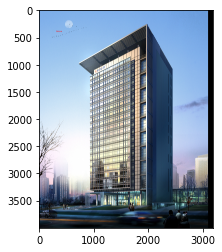

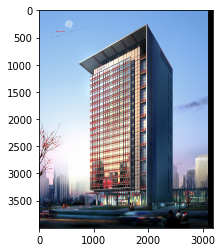

In [35]:
for name in dataset:
    image = cv.imread(name)
    image_ = image.copy()
    
    x = tuple(image.shape)
    para = [int(i) for i in x]
    h = int(para[1] * 0.1)
    w = int(para[0] * 0.1)

    #print("width={}, height={}, depth={}".format(w, h, d))
    cv.putText(image_,"Before",(h,w),cv.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    showImage(image_)
    findcorner(image, h, w)